# Notebook to check waves code

Is doing reasonable things?

Does it match SPM?

etc....

In [1]:
# plotting imports
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import datetime
# first imort stuff from GNOME:
import gnome
import gnome.environment.waves
reload(gnome.environment.waves)
Waves = gnome.environment.waves.Waves

from gnome.environment import wind
from gnome.environment import Water
from gnome.basic_types import datetime_value_2d

## fetch unlimited wave height

In [3]:
# create some sample wind and water objects
#start_time = datetime.datetime(2014, 12, 1, 0)
# 5 m/s
#series = np.array((start_time, (5, 45)),
#                      dtype=datetime_value_2d).reshape((1, ))
test_wind_5 = wind.constant_wind(5, 45)
default_water = Water()

In [4]:
w = Waves(test_wind_5, default_water)
U = range(40)
H = [w.compute_H(u) for u in U]
#print H

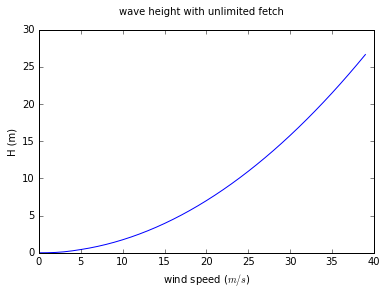

In [5]:
fig, ax = plt.subplots()
ax.plot(U,H)
fig.suptitle('wave height with unlimited fetch')
ax.set_xlabel('wind speed ($m/s$)')
ax.set_ylabel('H (m)')

**NOTE:** This seem to be pretty high for the large wind speeds -- which we dont really expect to do well anyway, but still. I think there are issues with wave hieght being depth limitied, etc, when it gets big. Also tiem scale -- a 3 or 6 or whatever time average isn't going to cut it with waves potentially this big.

In [6]:
water = Water()
w = Waves(test_wind_5, water)
H = []
# fetch range from 1km to 100km
fetch = range(1000, 100000, 1000)
for f in fetch:
    water.fetch = f
    H.append(w.compute_H(10))

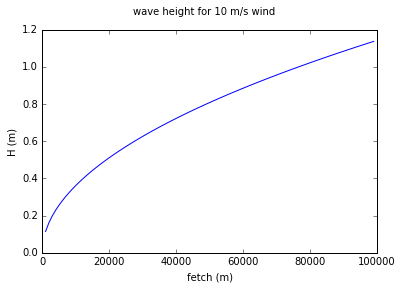

In [7]:
fig, ax = plt.subplots()
ax.plot(fetch, H)
fig.suptitle('wave height for 10 m/s wind')
ax.set_xlabel('fetch (m)')
ax.set_ylabel('H (m)')

## NOTE:

This seems kind of small -- only just over 1 m waves for 20 knot wind?

We need to check against the SPM.

This calculator:
https://woodshole.er.usgs.gov/project-pages/coastal_model/Tools/fetch_limited.html

gives 1.8m for 10m/s and very high fetch and duration (and deep water).


## Whitecap Fraction

Note that the slolution for $U < 4$ is pretty fudged -- used to be zero for $U < 3$, now it is a linear interpolation form 0 to the $U=4$ value. maybe an exponential or quadratic would be better?

In [11]:
water = Water()
w = Waves(test_wind_5, water)
wf = [] # whitecap fraction
U = np.arange(0,20,0.2)
for u in U:
    wf.append(w.whitecap_fraction(u))

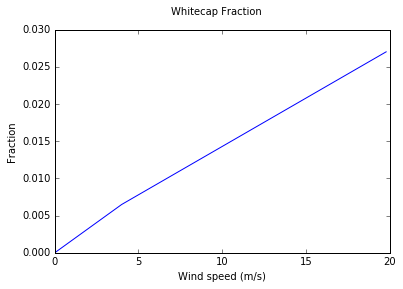

In [15]:
fig, ax = plt.subplots()
ax.plot(U, wf)
fig.suptitle('Whitecap Fraction')
ax.set_xlabel('Wind speed (m/s)')
ax.set_ylabel('Fraction')


## Energy Disspation rate



In [16]:
water = Water()
w = Waves(test_wind_5, water)
H = np.linspace(0, 3, 10)
eps = w.dissipative_wave_energy(H)


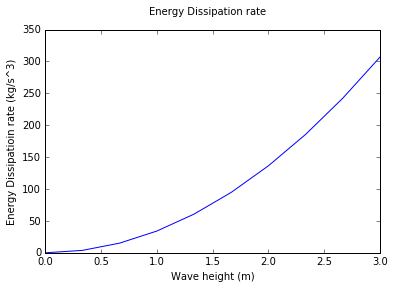

In [18]:
fig, ax = plt.subplots()
ax.plot(H, eps)
fig.suptitle('Energy Dissipation rate')
ax.set_xlabel('Wave height (m)')
ax.set_ylabel('Energy Dissipatioin rate (kg/s^3)')

In [21]:
eps = w.dissipative_wave_energy(1)
print "rate for 1m wave: %f kg/m^3"%eps

rate for 1m wave: 34.099243 kg/m^3


## Whitecap decay constant

We use a formula from Monahan (JPO, 1971)

The saltwater value for this constant is 3.85 sec while the freshwater value is 2.54 sec.

this code interpolated for other salinities.


In [22]:
# make sure we get what we think we should get.

from gnome.utilities.weathering.monahan import Monahan

In [25]:
print "fresh water value:", Monahan.whitecap_decay_constant(0)
print "salt water value:", Monahan.whitecap_decay_constant(35)


fresh water value: 2.54
salt water value: 3.84999995
